# First Make csv data

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

#shared path to drive
SHARED_PATH="/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"
#direct path to drive
DIRECT_PATH="/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"

# Determine the data path based on the existence of shared or direct paths
root_path = SHARED_PATH if os.path.exists(SHARED_PATH) else DIRECT_PATH if os.path.exists(DIRECT_PATH) else None

DATA_PATH = ''
# Print the chosen path or an error message
if root_path:
    DATA_PATH = root_path + "/Proj1_CGC_Building_with_sides_classify"
    print(f"Using path: {root_path}\n\n{os.listdir(DATA_PATH)}")
else:
    print("Neither shared nor direct path exists. Please check the paths.")


Mounted at /content/drive
Using path: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours

['validate_images', 'training_images', 'ALL_IMG_DATA', 'ALL_IMG_DATA.csv', 'no_side_one_output_classify', 'expr3_RUN_THIS_all_in_one_changable(two output).ipynb', 'ResNet18(ptrain)_2-output_accy-74_(lr-0.0001_bs-16_ep-5_sd-2025).pth', 'expr2_resnet18_two_output_(sides classify).ipynb', 'make_train-test-split_from_all_img_data.ipynb']


In [2]:
import pandas as pd
from IPython.display import display

root_dir = DATA_PATH+'/ALL_IMG_DATA'
image_dict = {}
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        image_dict[folder] = []
        for filename in os.listdir(folder_path):
            # if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            rel_path = folder_path.split('/')
            image_path = os.path.join('/',rel_path[-2], rel_path[-1],filename)
            image_dict[folder].append(image_path)

data = []
for folder_name, images in image_dict.items():
    print(f"Class: {folder_name}")
    class_name = folder_name.split('_')[0]
    subclass_name = folder_name.split('_')[1]
    for img_path in images:
        data.append({
            'path': img_path,
            'class': class_name,
            'subclass': subclass_name})

df = pd.DataFrame(data)

# print(image_dict.keys)
# print(data)
display(df)
print(df.describe())

Class: gurudeb_front
Class: heritage_front
Class: gurudeb_right
Class: gurudeb_left
Class: admin_front
Class: admin_left
Class: admin_right
Class: heritage_left
Class: chemistry_front
Class: chemistry_right
Class: chemistry_left


,path,class,subclass
0,/ALL_IMG_DATA/gurudeb_front/gurudeb_005.jpeg,gurudeb,front
1,/ALL_IMG_DATA/gurudeb_front/gurudeb_004.jpeg,gurudeb,front
2,/ALL_IMG_DATA/gurudeb_front/frame_0210.jpg,gurudeb,front
3,/ALL_IMG_DATA/gurudeb_front/gurudeb_002.jpeg,gurudeb,front
4,/ALL_IMG_DATA/gurudeb_front/gurufront_00040.jpeg,gurudeb,front
...,...,...,...
364,/ALL_IMG_DATA/chemistry_left/chemleft_00024.jpeg,chemistry,left
365,/ALL_IMG_DATA/chemistry_left/chemleft_00025.jpeg,chemistry,left
366,/ALL_IMG_DATA/chemistry_left/chemleft_00026.jpeg,chemistry,left
367,/ALL_IMG_DATA/chemistry_left/chemleft_00027.jpeg,chemistry,left


                                                path      class subclass
count                                            369        369      369
unique                                           369          4        3
top     /ALL_IMG_DATA/chemistry_left/images (2).jpeg  chemistry    front
freq                                               1        112      149


In [3]:
# save csv data
df.to_csv(DATA_PATH+'/ALL_IMG_DATA.csv', index=False)
os.listdir(DATA_PATH)

['validate_images',
 'training_images',
 'ALL_IMG_DATA',
 'ALL_IMG_DATA.csv',
 'no_side_one_output_classify',
 'expr3_RUN_THIS_all_in_one_changable(two output).ipynb',
 'ResNet18(ptrain)_2-output_accy-74_(lr-0.0001_bs-16_ep-5_sd-2025).pth',
 'expr2_resnet18_two_output_(sides classify).ipynb',
 'make_train-test-split_from_all_img_data.ipynb']

In [4]:

# Group by 'subclass' and 'class', then count the occurrences
df_2dhist = df.groupby('subclass')['class'].value_counts()
print(df_2dhist)

# Unstack the multi-index to get the desired DataFrame format
df_2dhist = df_2dhist.unstack(level='subclass')

display(df_2dhist)
# Fill NaN values with 0 and convert the data type to integer
df_2dhist = df_2dhist.fillna(0).astype(int)

subclass  class    
front     gurudeb      41
          chemistry    40
          admin        34
          heritage     34
left      chemistry    35
          heritage     32
          admin        27
          gurudeb      27
right     chemistry    37
          admin        32
          gurudeb      30
Name: count, dtype: int64


subclass,front,left,right
class,,,
admin,34.0,27.0,32.0
chemistry,40.0,35.0,37.0
gurudeb,41.0,27.0,30.0
heritage,34.0,32.0,NaN


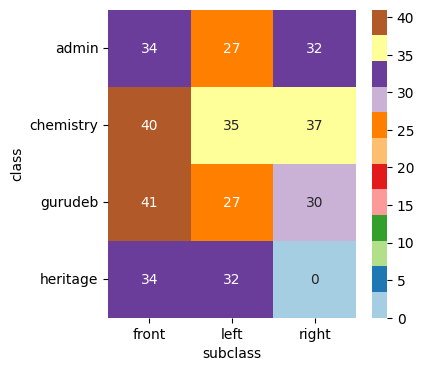

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(4, 4))

# Use 'd' format specifier for integer counts in annotations
sns.heatmap(df_2dhist, cmap='Paired', annot=True, fmt='d')
plt.xlabel('subclass')
_ = plt.ylabel('class')
plt.yticks(rotation=0)
plt.show() # Add plt.show() to display the plot

In [6]:
from sklearn.model_selection import train_test_split

# splitting a dataset in such a way that the proportion of samples in each class is the same across the training and testing sets.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

print('------------',len(train_df),'----------------')
display(train_df.head())
print('------------',len(test_df),'----------------')
display(test_df.head())

# save train and test data csv
# train_df.to_csv(DATA_PATH+'/training_df.csv', index=False)
# test_df.to_csv(DATA_PATH+'/validate_df.csv', index=False)

------------ 295 ----------------


,path,class,subclass
335,/ALL_IMG_DATA/chemistry_left/frame_0074.jpg,chemistry,left
95,/ALL_IMG_DATA/gurudeb_right/gururight_0001.jpeg,gurudeb,right
50,/ALL_IMG_DATA/heritage_front/heri_front_00018.jpg,heritage,front
131,/ALL_IMG_DATA/gurudeb_left/guruleft_0007.jpeg,gurudeb,left
164,/ALL_IMG_DATA/admin_front/adm_main_0002.jpeg,admin,front


------------ 74 ----------------


,path,class,subclass
257,/ALL_IMG_DATA/chemistry_front/chem_fr_00040.jpeg,chemistry,front
169,/ALL_IMG_DATA/admin_left/adm_out_00016.jpg,admin,left
241,/ALL_IMG_DATA/heritage_left/heri_side_00030.jpg,heritage,left
206,/ALL_IMG_DATA/admin_right/frame_0112.jpg,admin,right
364,/ALL_IMG_DATA/chemistry_left/chemleft_00024.jpeg,chemistry,left


# Make train and validation folder from splited csv data

In [ ]:
import os
import shutil

# Define the target directories
train_dir = os.path.join(DATA_PATH, 'training_images')
val_dir = os.path.join(DATA_PATH, 'validate_images') # Using 'val' for validation as is common

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create class subdirectories within train and validation directories
for class_name in df['class'].unique():
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# Function to copy images based on DataFrame
def copy_images(dataframe, destination_dir):
    for index, row in dataframe.iterrows():
        image_path = row['path']
        class_name = row['class']+'_'+row['subclass']

        source_path = os.path.join(DATA_PATH, image_path.lstrip('/')) # Adjust this line based on your exact path structure

        destination_path = os.path.join(destination_dir, class_name, os.path.basename(source_path))

        try:
            shutil.copy(source_path, destination_path)
            print(f'copy{source_path.split("/")[-3:]} -->> {destination_path.split("/")[-3:]}')
        except FileNotFoundError:
            print(f"Warning: File not found at {source_path}. Skipping.")


# Copy images for the training set
print("Copying training images.................")
copy_images(train_df, train_dir)

# Copy images for the validation set
print("Copying validation images...............")
copy_images(test_df, val_dir)

print("________Image copying complete_________")

Copying training images.................
copy['ALL_IMG_DATA', 'chemistry_right', 'chemright00030.jpeg'] -->> ['training_images', 'chemistry_right', 'chemright00030.jpeg']
copy['ALL_IMG_DATA', 'heritage_front', 'heri_front_0007.webp'] -->> ['training_images', 'heritage_front', 'heri_front_0007.webp']
copy['ALL_IMG_DATA', 'gurudeb_left', 'guruleft_00019.jpeg'] -->> ['training_images', 'gurudeb_left', 'guruleft_00019.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_right', 'gururight_00024.jpeg'] -->> ['training_images', 'gurudeb_right', 'gururight_00024.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_left', 'guruleft_00013.jpeg'] -->> ['training_images', 'gurudeb_left', 'guruleft_00013.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_front', 'gurufront_0005.jpeg'] -->> ['training_images', 'gurudeb_front', 'gurufront_0005.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_front', 'gurufront_00017.jpeg'] -->> ['training_images', 'gurudeb_front', 'gurufront_00017.jpeg']
copy['ALL_IMG_DATA', 'heritage_front', 'heri_front_00021.jpeg'] -->> 

In [ ]:
# You can verify the structure and content of the new directories
print(os.listdir(train_dir))
print(os.listdir(val_dir))
print(os.listdir(os.path.join(train_dir, df['class'].unique()[0]))) # Example for one class

['gurudeb_front', 'heritage_front', 'gurudeb_right', 'gurudeb_left', 'admin_front', 'admin_left', 'admin_right', 'heritage_left', 'chemistry_front', 'chemistry_right', 'chemistry_left']
['gurudeb_front', 'heritage_front', 'gurudeb_right', 'gurudeb_left', 'admin_front', 'admin_left', 'admin_right', 'heritage_left', 'chemistry_front', 'chemistry_right', 'chemistry_left']
['gurufront_0005.jpeg', 'gurufront_00017.jpeg', 'gurufront_00024.jpeg', 'gurudeb_005.jpeg', 'gurufront_00012.jpeg', 'gurufront_00035.jpeg', 'gurufront_00023.jpeg', 'gurufront_00026.jpeg', 'gurufront_00034.jpeg', 'gurufront_00029.jpeg', 'gurufront_00042.jpeg', 'gurufront_00016.jpeg', 'gurufront_00011.jpeg', 'gurufront_00018.jpeg', 'gurufront_00040.jpeg', 'gurufront_00038.jpeg', 'gurufront_00019.jpeg', 'gurufront_00037.jpeg', 'gurufront_00030.jpeg', 'gurufront_00010.jpeg', 'gurufront_00015.jpeg', 'gurufront_00022.jpeg', 'gurufront_00020.jpeg', 'gurufront_00033.jpeg', 'gurufront_00021.jpeg', 'gurufront_00013.jpeg', 'gurufro